<a href="https://colab.research.google.com/github/maneeshdisodia/DearML/blob/master/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Super+Store+Data.xlsx to Super+Store+Data.xlsx


In [ ]:
#!pip install prophet

In [2]:
import pandas as pd

In [13]:
df =pd.read_excel("Super+Store+Data.xlsx")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   Sales        9994 non-null   float64       
 2   Quantity     9994 non-null   int64         
 3   State        9994 non-null   object        
 4   total_sales  9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 390.5+ KB


In [14]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [15]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
select = ['Order Date','Sales','Quantity','State']

In [17]:
df =df[select]

In [18]:
df['total_sales'] = df['Sales'] * df['Quantity']

In [19]:
df.head()

,Order Date,Sales,Quantity,State,total_sales
0,2016-11-08,261.9600,2,Kentucky,523.9200
1,2016-11-08,731.9400,3,Kentucky,2195.8200
2,2016-06-12,14.6200,2,California,29.2400
3,2015-10-11,957.5775,5,Florida,4787.8875
4,2015-10-11,22.3680,2,Florida,44.7360


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   Sales        9994 non-null   float64       
 2   Quantity     9994 non-null   int64         
 3   State        9994 non-null   object        
 4   total_sales  9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 390.5+ KB


In [24]:
!pip install fbprophet

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        



In [39]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    

    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

        
    # Plot time series plot of numeric data
    time_series_plot(df)

Preview of data:


,Order Date,total_sales
0,2016-11-08,523.92
1,2016-11-08,2195.82
2,2016-06-12,29.24



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order Date   9994 non-null   datetime64[ns]
 1   total_sales  9994 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 156.3 KB
None

***Number of duplicated entries:  10


,Order Date,total_sales
3276,2014-04-05,160.720
3279,2014-04-05,160.720
3405,2014-04-23,562.744
3406,2014-04-23,562.744
2634,2015-07-05,9.856



To check time series of numeric data  by daily, monthly and yearly frequency
Plotting daily data


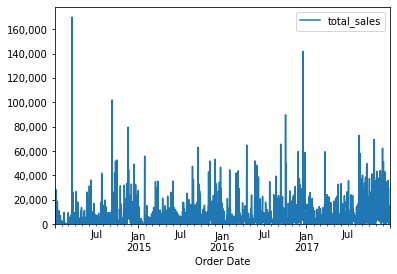

Plotting monthly data


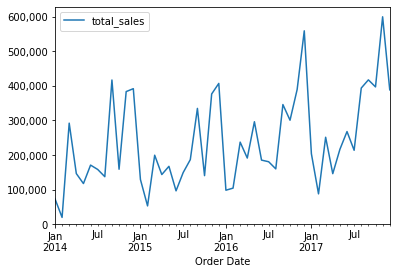

In [40]:
eda(df[['Order Date','total_sales']])


In [42]:
df['Order Date'].value_counts()

2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2015-01-26     1
2015-05-09     1
2014-11-06     1
2017-01-09     1
2015-12-16     1
Name: Order Date, Length: 1237, dtype: int64

In [43]:
df.set_index('Order Date',inplace =True)

In [46]:
df.drop(['Sales', 'Quantity', 'State'],axis =1,inplace=True)

In [48]:
df

,total_sales
Order Date,
2016-11-08,523.9200
2016-11-08,2195.8200
2016-06-12,29.2400
2015-10-11,4787.8875
2015-10-11,44.7360
...,...
2014-01-21,75.7440
2017-02-26,183.9200
2017-02-26,517.1520


In [57]:
df =df.reset_index().resample('D', on='Order Date').sum()

In [58]:
df.reset_index(inplace=True)

In [61]:
df.columns = ['ds','y']

In [121]:
df['y'] = np.log(1+df['y'])

In [122]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [123]:
future = model.make_future_dataframe(periods=365)

In [124]:
future.tail()

,ds
1818,2018-12-26
1819,2018-12-27
1820,2018-12-28
1821,2018-12-29
1822,2018-12-30


In [125]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1818,2018-12-26,5.371836,2.114891,9.067040
1819,2018-12-27,8.310514,4.682023,11.724154
1820,2018-12-28,9.630207,6.222418,12.944020
1821,2018-12-29,9.555509,5.834307,12.956470
1822,2018-12-30,9.197395,5.786252,12.387933


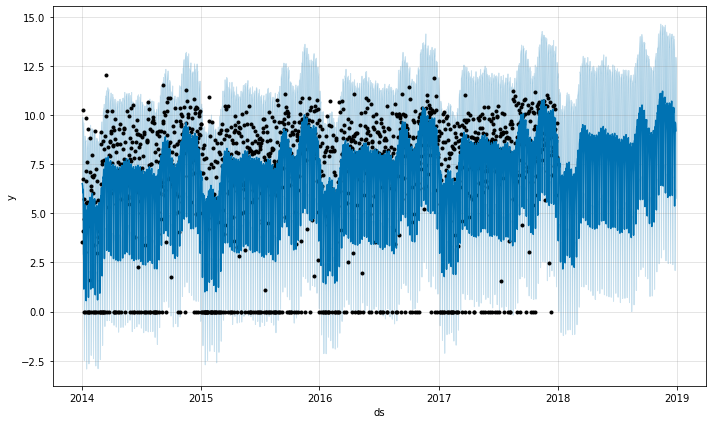

In [126]:
fig1 = model.plot(forecast)

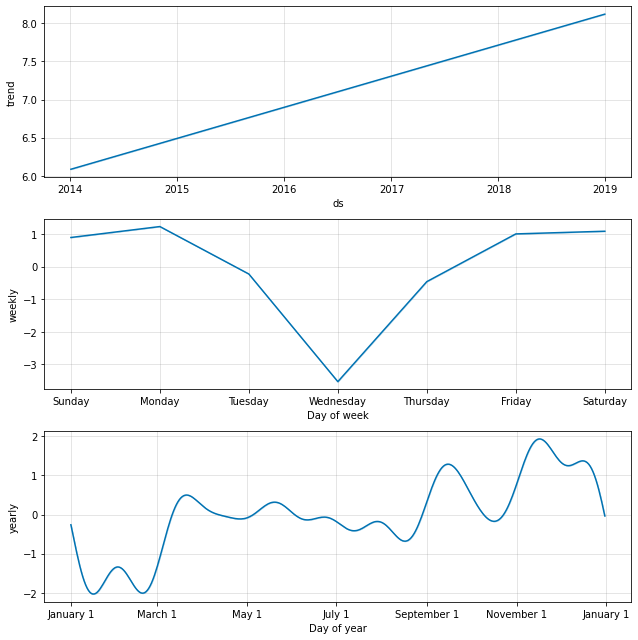

In [127]:
fig2 = model.plot_components(forecast)


In [128]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(model, forecast)

In [129]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 3 forecasts with cutoffs between 2016-01-05 00:00:00 and 2016-12-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-01-06,2.969696,-0.733653,6.938755,0.000000,2016-01-05
1,2016-01-07,3.368879,-0.129184,6.962685,5.457063,2016-01-05
2,2016-01-08,6.096021,2.657573,9.910857,9.279385,2016-01-05
3,2016-01-09,5.928462,1.928949,9.808009,8.553031,2016-01-05
4,2016-01-10,5.339258,1.430151,9.062252,6.371424,2016-01-05


In [130]:

from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,37 days,10.341959,3.215892,2.642293,0.349987,0.697248
1,38 days,10.198143,3.193453,2.637313,0.353948,0.703364
2,39 days,10.220233,3.196910,2.631078,0.353948,0.703364
3,40 days,10.162260,3.187830,2.626088,0.353948,0.712538
4,41 days,10.079161,3.174770,2.603970,0.357299,0.715596


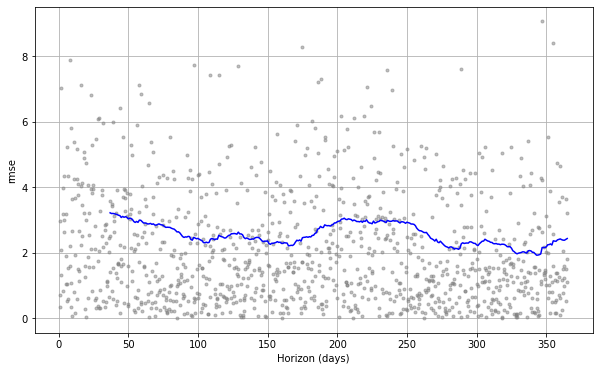

In [131]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

In [150]:
# to get the forcast on perticuler date

np.exp(forecast[forecast.ds == '2014-01-03']['yhat'])

0    671.620211
Name: yhat, dtype: float64

In [139]:
np.exp(forecast['yhat'])

0         671.620211
1         609.425570
2         422.436978
3         499.958345
4          99.347680
            ...     
1818      215.257678
1819     4066.404441
1820    15217.580268
1821    14122.275508
1822     9871.384648
Name: yhat, Length: 1823, dtype: float64

0    671.620211
Name: yhat, dtype: float64